In [1]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR

from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Data/data_2.csv')

In [3]:
df

,Point,Trees,Shrubs,Peren_FG,bare_groun,Annual_FG,ppt,vpdmin,vpdmax,tmin,...,aspect,Runoff,Frosting_R,Flooding_F,BD_depth,AWS_50cm,AWS_25cm,AWS_150cm,AWS_100cm,Min_WTD
0,1,19,8,47,7,22,1003.760,8.6440,149.085,49.1187,...,180.0860,3,3,3,0.0,11.4900,5.7500,33.4300,22.9200,153.0
1,2,2,1,66,14,8,822.610,8.9776,138.599,46.5965,...,211.4610,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
2,3,3,1,69,2,14,849.481,9.4117,138.963,47.8117,...,186.5640,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
3,4,20,4,51,11,21,854.956,8.1519,135.181,45.4194,...,161.3930,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
4,5,18,11,50,9,20,849.242,9.2913,138.704,47.6300,...,121.3640,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4793,13,8,57,15,23,789.471,12.5005,176.244,69.1463,...,297.1450,0,-1,0,0.0,2.1439,1.0640,6.4935,4.3117,0.0
4793,4794,36,7,43,1,12,778.307,8.1716,180.426,41.2986,...,25.7692,6,2,1,38.0,3.9900,2.5500,3.9900,3.9900,0.0
4794,4795,36,9,53,2,13,706.038,9.8153,175.318,46.5239,...,21.0057,6,2,1,38.0,3.9900,2.5500,3.9900,3.9900,0.0
4795,4796,33,4,43,3,11,713.786,13.5313,179.063,65.2216,...,68.3994,0,0,0,0.0,2.1172,1.1507,4.5539,3.3355,0.0


In [4]:
df = df[~(df.values.ravel() == -1).reshape(df.shape).any(1)]

In [5]:
df

,Point,Trees,Shrubs,Peren_FG,bare_groun,Annual_FG,ppt,vpdmin,vpdmax,tmin,...,aspect,Runoff,Frosting_R,Flooding_F,BD_depth,AWS_50cm,AWS_25cm,AWS_150cm,AWS_100cm,Min_WTD
0,1,19,8,47,7,22,1003.760,8.6440,149.085,49.1187,...,180.0860,3,3,3,0.0000,11.4900,5.7500,33.4300,22.9200,153.0
1,2,2,1,66,14,8,822.610,8.9776,138.599,46.5965,...,211.4610,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
2,3,3,1,69,2,14,849.481,9.4117,138.963,47.8117,...,186.5640,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
3,4,20,4,51,11,21,854.956,8.1519,135.181,45.4194,...,161.3930,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
4,5,18,11,50,9,20,849.242,9.2913,138.704,47.6300,...,121.3640,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,4791,51,7,43,3,10,828.338,8.7542,180.391,42.9977,...,269.6360,5,2,1,38.0000,5.1000,4.2500,5.1000,5.1000,0.0
4791,4792,17,7,67,1,10,868.329,8.8903,176.260,40.5698,...,301.8970,6,2,1,40.1869,4.1027,2.5825,4.4481,4.3668,0.0
4793,4794,36,7,43,1,12,778.307,8.1716,180.426,41.2986,...,25.7692,6,2,1,38.0000,3.9900,2.5500,3.9900,3.9900,0.0
4794,4795,36,9,53,2,13,706.038,9.8153,175.318,46.5239,...,21.0057,6,2,1,38.0000,3.9900,2.5500,3.9900,3.9900,0.0


In [6]:
df=df.sample(frac=1) #Shuffle the data

In [7]:
#df['Trees']= (df['Trees'] > 40).astype(int)

In [8]:
y = df['Trees']

In [9]:
best_feature_mse = ['Shrubs', 'Peren_FG', 'bare_groun', 'Annual_FG', 'vpdmax', 'tmean',
       'slope', 'Runoff', 'Flooding_F', 'BD_depth']

In [10]:
best_df = df[best_feature_mse]

In [11]:
X = np.array(best_df)
y = np.array(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(3344, 10)

In [15]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

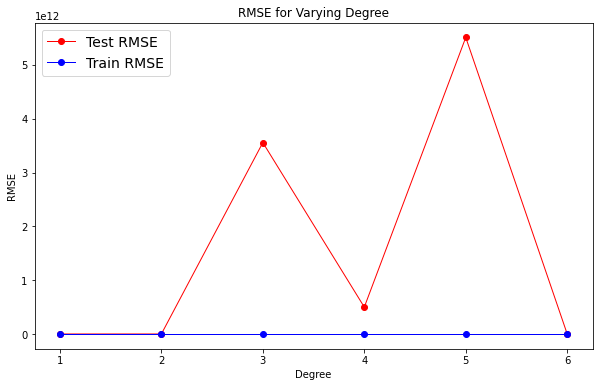


Optimal Degree:  1


In [20]:
degreeList = [1,2,3,4,5,6]


mse_train, mse_test = [], []

for degree in degreeList:

    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), LinearRegression()) 
  
    model.fit(X_train, y_train)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    
    mse_train.append(mean_squared_error(y_train, y_train_predicted))
    mse_test.append(mean_squared_error(y_test, y_test_predicted))
   

plt.figure(figsize=(10, 6))   
plt.plot(degreeList, np.sqrt(mse_test), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
plt.plot(degreeList, np.sqrt(mse_train), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE") 
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Degree")
plt.show()

# Find the value of optimal degree for the polynomial that gives smallest RMSE

rmse_test = np.sqrt(mse_test)
j = 0
min_rmse = rmse_test[j]
optimal_degree = 1

for i in degreeList:
    if(rmse_test[j] < min_rmse):
        min_rmse = rmse_test[j]
        optimal_degree = i
    j +=1
    
print("\nOptimal Degree: ", optimal_degree)

In [21]:
# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = optimal_degree


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [22]:
print("No. of Original Features: ", X_train.shape[1])
print("No. of Augmented Features: ", X_train_poly.shape[1])

No. of Original Features:  10
No. of Augmented Features:  10


# Classifiers

## KNN Classifier

In [ ]:

%%time

warnings.filterwarnings('ignore')


# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values 
param_grid = {'n_neighbors': np.arange(1, 37, 2), 'p': [1, 2, 5, 10, 20, 30, 50, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

In [ ]:
knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

In [ ]:

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

In [ ]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_train,y_scores)

In [ ]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


threshold_optimal = 0.5
for i in range(len(precisions)):
    if(abs(abs(precisions[i]) - abs(recalls[i]))<=0.005):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

In [ ]:
#Use variable threshold.
print("Performance Measures Based on the Default Threshold:\n")


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_train = precision_score(y_train, y_train_pred) 
print("Precision (Default Threshold 0.5) = %f" % precision_train)

recall_train = recall_score(y_train, y_train_pred)
print("Recall (Default Threshold 0.5) = %f" % recall_train)


f1_train = f1_score(y_train, y_train_pred)
print("F1 Score (Default Threshold 0.5) = %f" % f1_train)

print("Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_train, y_train_pred))


print("\n-------------------------------------------------------\n")
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = threshold_optimal # optimal threshold from precision-recall curve 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:,1] > t).astype(int)


precision = precision_score(y_train, y_train_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_train, y_train_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))


print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_train, y_train_predicted_new))

In [ ]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

In [ ]:
precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)

In [ ]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

In [ ]:
print(classification_report(y_test,y_test_predicted))

## Naive-Bayes

### Gaussian Naive Bayes Classifier

In [ ]:
%%time

warnings.filterwarnings('ignore')

param_grid = {'var_smoothing': [0.001, 0.01, 0.1, 1.0]}

gnb = GaussianNB()

gnb = GridSearchCV(gnb, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
gnb.fit(X_train, y_train)

params_optimal = gnb.best_params_

print("Best Score (accuracy): %f" % gnb.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

In [ ]:
%%time

gaussianNB_clf = GaussianNB(**params_optimal)

gaussianNB_clf.fit(X_train, y_train)

In [ ]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(gnb, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

In [ ]:
y_test_predicted = gaussianNB_clf.predict(X_test)


accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print("\nTest Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted, average='micro')
print("\nTest F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

### Multinomial Naive-Bayes Classifier NO GOOD OUT
NOTES: CURRENT TEST DATA WILL NOT RUN WITH MULTINOMIAL NB, DUE TO THE X_train dataset having negative values. THus, I have input the absolute value of X_train

In [ ]:
%%time

warnings.filterwarnings('ignore')

param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.01]}
mnb = MultinomialNB()


mnb = GridSearchCV(mnb, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

mnb.fit(abs(X_train), y_train)

params_optimal = mnb.best_params_

print("Best Score (accuracy): %f" % mnb.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

In [ ]:
%%time

multinomialNB_clf = MultinomialNB(**params_optimal)

multinomialNB_clf.fit(abs(X_train), y_train)

In [ ]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(mnb, abs(X_test), y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

In [ ]:
y_test_predicted_mnb = multinomialNB_clf.predict(X_test)


accuracy_score_test = np.mean(y_test_predicted_mnb == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_mnb))

precision_test = precision_score(y_test, y_test_predicted_mnb, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted_mnb, average='micro')
print("\nTest Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted_mnb, average='micro')
print("\nTest F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_mnb))

## SVM Classifiers

### LinearSVC (Current optimal with current data processing)

In [ ]:
LinSVC = LinearSVC(random_state=42)

In [ ]:

%%time
param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'C' : [ 1 , 35, 50, 100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol' : [0.1 , 0.01, 0.001, 0.0001],
    'max_iter' : [10, 35, 50, 100, 500, 1000, 5000, 10000],
}

LinSVC_cv = GridSearchCV(LinSVC, param_grid, scoring='accuracy', cv=5)

LinSVC_cv = LinSVC_cv.fit(X_train, y_train)

print("\nBest Score: %f" % LinSVC_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, LinSVC_cv.best_params_[param_name]))

In [ ]:

LinSVC= LinearSVC(random_state=42, C=LinSVC_cv.best_params_['C'], loss=LinSVC_cv.best_params_['loss'], max_iter=LinSVC_cv.best_params_['max_iter'], penalty= LinSVC_cv.best_params_['penalty'], tol=LinSVC_cv.best_params_['tol']).fit(X_train, y_train)
LinSVC.fit(X_train, y_train)

y_train_predicted = LinSVC.predict(X_train)


print("Training Accuracy: ", LinSVC.score(X_train, y_train))
y_test_predicted = LinSVC.predict(X_test)



print("Test Accuracy: ", LinSVC.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

#### LinearSVC: Polynomial Model

In [ ]:
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

We shall find the optimal degree, using our best LinearSVC model hyperperameters, for our polynomial model.

In [ ]:
%%time

degreeList = [1,2,3,4,5,6]
accuracy_train, accuracy_val = [], []

for degree in degreeList:
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), 
                          LinearSVC(random_state=42, C=LinSVC_cv.best_params_['C'], loss=LinSVC_cv.best_params_['loss'], max_iter=LinSVC_cv.best_params_['max_iter'], penalty= LinSVC_cv.best_params_['penalty'], tol=LinSVC_cv.best_params_['tol'])) 

    model.fit(X_train_fold, y_train_fold)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train_fold)
    y_val_predicted = model.predict(X_val_fold)
    
    accuracy_train.append(model.score(X_train_fold, y_train_fold))
    accuracy_val.append(model.score(X_val_fold, y_val_fold))


plt.figure(figsize=(10, 6))   
plt.plot(degreeList, accuracy_val, "ro-", alpha=1.0, linewidth=1.0, label="Validation Accuracy")
plt.plot(degreeList, accuracy_train, "bo-", alpha=1.0, linewidth=1.0, label="Train Accuracy")  

plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy for Varying Degree")
plt.show()



# Find the value of degree that gives max validation accuracy
j = 0
max_val_accuracy = accuracy_val[j]
optimal_degree = 1

for i in degreeList:
    if(accuracy_val[j] > max_val_accuracy):
        max_val_accuracy = accuracy_val[j]
        optimal_degree = i
    j +=1
    
print("Optimal Degree: ", optimal_degree)
print("\n")

In [ ]:
# Variable that speficies the degree of the polynomial to be added to the feature vector
optimal_poly_degree = optimal_degree


scaled_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=optimal_poly_degree)),
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(random_state=42, C=LinSVC_cv.best_params_['C'], loss=LinSVC_cv.best_params_['loss'], max_iter=LinSVC_cv.best_params_['max_iter'], penalty= LinSVC_cv.best_params_['penalty'], tol=LinSVC_cv.best_params_['tol']))
    ])


scaled_svm_clf.fit(X, y)

y_train_predicted = scaled_svm_clf.predict(X_train)


print("Training Accuracy: ", scaled_svm_clf.score(X_train, y_train))

y_test_predicted = scaled_svm_clf.predict(X_test)
print("Test Accuracy: ", scaled_svm_clf.score(X_test, y_test))


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

### SVC -> Kernelized SVM

#### SVC: Linear Kernel

In [ ]:
svc_clf = SVC(kernel='linear')

In [ ]:
%%time
param_grid = {
    'gamma': ['scale', 'auto'],
    'C' : [ 1 , 35, 50, 100, 500, 1000],
    'tol' : [0.1 , 0.01, 0.001, 0.0001],
    'max_iter' : [10, 35, 50, 100, 500, 1000],
}

svc_clf_cv = GridSearchCV(svc_clf, param_grid, scoring='accuracy', cv=5)

svc_clf_cv = svc_clf_cv.fit(X_train, y_train)

print("\nBest Score: %f" % svc_clf_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svc_clf_cv.best_params_[param_name]))


In [ ]:
svc_clf = SVC(kernel='linear', C= svc_clf_cv.best_params_['C'], tol= svc_clf_cv.best_params_['tol'], gamma= svc_clf_cv.best_params_['gamma'], max_iter= svc_clf_cv.best_params_['max_iter'], ).fit(X_train, y_train)

svc_clf.fit(X_train, y_train)

y_train_predicted = svc_clf.predict(X_train)

print("Training Accuracy: ", svc_clf.score(X_train, y_train))
y_test_predicted = svc_clf.predict(X_test)
print("Test Accuracy: ", svc_clf.score(X_test, y_test))


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

#### SVC: Polynomial Kernel

In [ ]:
svc_poly_clf = SVC(kernel='poly')

In [ ]:
%%time
param_grid = {
    'gamma': ['scale', 'auto'],
    'C' : [ 1 , 35, 50, 100, 500, 1000],
    'degree' : [1, 2, 3, 4, 5, 6],
    'tol' : [0.1 , 0.01, 0.001, 0.0001],
    'max_iter' : [10, 35, 50, 100, 500, 1000],
}

svc_poly_clf_cv = GridSearchCV(svc_poly_clf, param_grid, scoring='accuracy', cv=5)

svc_poly_clf_cv = svc_poly_clf_cv.fit(X_train, y_train)

print("\nBest Score: %f" % svc_poly_clf_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svc_poly_clf_cv.best_params_[param_name]))



In [ ]:
%%time

degreeList = [1,2,3,4,5,6]
accuracy_train, accuracy_val = [], []

for degree in degreeList:
    model = SVC(C=svc_poly_clf_cv.best_params_['C'], kernel='poly', degree=degree, gamma= svc_poly_clf_cv.best_params_['gamma'], max_iter= svc_poly_clf_cv.best_params_['max_iter'], tol= svc_poly_clf_cv.best_params_['tol'])
  
    model.fit(X_train_fold, y_train_fold)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train_fold)
    y_val_predicted = model.predict(X_val_fold)
    
    
    accuracy_train.append(model.score(X_train_fold, y_train_fold))
    accuracy_val.append(model.score(X_val_fold, y_val_fold))
      

plt.figure(figsize=(10, 6))   
plt.plot(degreeList, accuracy_val, "ro-", alpha=1.0, linewidth=1.0, label="Validation Accuracy")
plt.plot(degreeList, accuracy_train, "bo-", alpha=1.0, linewidth=1.0, label="Train Accuracy")  

plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy for Varying Degree")
plt.show()

# Find the value of degree that gives max validation accuracy
j = 0
max_val_accuracy = accuracy_val[j]
optimal_degree = 1

for i in degreeList:
    if(accuracy_val[j] > max_val_accuracy):
        max_val_accuracy = accuracy_val[j]
        optimal_degree = i
    j +=1
    
print("Optimal Degree: ", optimal_degree)
print("\n")

In [ ]:
svc_clf = SVC(C=svc_poly_clf_cv.best_params_['C'], kernel='poly', degree=optimal_degree, gamma= svc_poly_clf_cv.best_params_['gamma'], max_iter= svc_poly_clf_cv.best_params_['max_iter'], tol= svc_poly_clf_cv.best_params_['tol']).fit(X_train, y_train)

svc_clf.fit(X_train, y_train)


y_train_predicted = svc_clf.predict(X_train)


print("Training Accuracy: ", svc_clf.score(X_train, y_train))
y_test_predicted = svc_clf.predict(X_test)

print("Test Accuracy: ", svc_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

#### SVC: Gaussian Radial Basis Function Kernel

In [ ]:
svm_rbf_clf = SVC(kernel="rbf")

In [ ]:

%%time
param_grid = {
    'gamma': ['scale', 'auto'],
    'C' : [ 1 , 35, 50, 100, 500, 1000],
    #'degree': [1,2,3,4,5,6],
    'tol' : [0.1 , 0.01, 0.001, 0.0001],
    'max_iter' : [10, 35, 50, 100, 500],
}

svm_sbf_cv = GridSearchCV(svm_rbf_clf, param_grid, scoring='accuracy', cv=5)

svm_rbf_cv = svm_sbf_cv.fit(X_train, y_train)

print("\nBest Score: %f" % svm_rbf_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svm_rbf_cv.best_params_[param_name]))

In [ ]:

svm_rbf_clf.fit(X_train, y_train)

y_train_predicted = svm_rbf_clf.predict(X_train)


print("Training Accuracy: ", svm_rbf_clf.score(X_train, y_train))
y_test_predicted = svm_rbf_clf.predict(X_test)
print("Test Accuracy: ", svm_rbf_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

### SVM using the SGDClassifier

In [ ]:
%%time

svm_sgd = Pipeline([
        ('clf', SGDClassifier(loss='hinge')),
    ])

In [ ]:

%%time
param_grid = {
    'clf__alpha': [1e-4, 1e-5],
    'clf__penalty': ['l2', 'l1'],
    'clf__max_iter': [10, 35, 50, 100, 500],
    'clf__tol' : [0.1, 1, 0.01, 0.001,0.0001],
    'clf__eta0' : [0.1, 0.01, 0.001, 0.0001],
    'clf__learning_rate' : ['constant', 'adaptive'],
}

svm_sgd_cv = GridSearchCV(svm_sgd, param_grid, scoring='accuracy', cv=5)

svm_sgd_cv = svm_sgd_cv.fit(X_train, y_train)

print("\nBest Score: %f" % svm_sgd_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svm_sgd_cv.best_params_[param_name]))

In [ ]:
%%time

svm_sgd = Pipeline([
        ('clf', SGDClassifier(loss='hinge', penalty=svm_sgd_cv.best_params_['clf__penalty'], alpha=svm_sgd_cv.best_params_['clf__alpha'], eta0=svm_sgd_cv.best_params_['clf__eta0'], learning_rate=svm_sgd_cv.best_params_['clf__learning_rate'], random_state=42, max_iter=svm_sgd_cv.best_params_['clf__max_iter'], tol=svm_sgd_cv.best_params_['clf__tol'])),
    ])
svm_sgd.fit(X_train, y_train)

In [ ]:
%%time

y_test_predicted = svm_sgd.predict(X_test)

print("\nAccuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print("\nTest Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted, average='micro')
print("\nTest F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

# Regressions

## Ridge Regression

In [23]:
%%time


# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values

param_grid = {'alpha': np.linspace(0.01, 1.0, num=40), 
              'solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "saga"]}

ridge = Ridge()

ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
ridge_cv.fit(X_train_poly, y_train)


params_optimal_ridge = ridge_cv.best_params_

print("Best Score (negative mean squared error): %f" % ridge_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_ridge)
print("\n")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    3.0s


Best Score (negative mean squared error): -27.142928
Optimal Hyperparameter Values:  {'alpha': 0.03538461538461538, 'solver': 'saga'}


Wall time: 3.53 s


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    3.4s finished


In [24]:
# Ridge Regression


# Optimal model parameters
ridge_alpha = ridge_cv.best_params_['alpha']
print("Optimal alpha: ", ridge_alpha)

ridge_solver = ridge_cv.best_params_['solver']
print("Optimal alpha: ", ridge_solver)


# Create Ridge linear regression object
lin_reg_ridge = Ridge(alpha=ridge_alpha, solver=ridge_solver)

# Train the model
lin_reg_ridge.fit(X_train_poly, y_train)



print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_ridge = lin_reg_ridge.predict(X_train_poly)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_ridge))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_ridge))

Optimal alpha:  0.03538461538461538
Optimal alpha:  saga

----------------------------- Model Evaluation -----------------------------

Mean squared error: 26.87
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.73


In [25]:
# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly_features.fit_transform(X_test)


print("\n----------------------------- Test Model Evaluation -----------------------------")

# Make prediction 
y_test_poly_predicted = lin_reg_ridge.predict(X_test_poly)


ridge_test_mse = mean_squared_error(y_test, y_test_poly_predicted)

print("\nMean squared error: %.2f" % ridge_test_mse)



ridge_test_r2_score = r2_score(y_test, y_test_poly_predicted)
print('Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' 
      % ridge_test_r2_score)
print(y_test, y_test_poly_predicted)


----------------------------- Test Model Evaluation -----------------------------

Mean squared error: 26.81
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.72
[ 4  1 38  1  7 29 15 18 26  2  7 12  7 46  8 26  4  1  5 12  6  2 16  9
  7  3 23  6 15 24  4  2 18 52  3 20 17  2 13 10  0  9 34  6  4  0  4  3
  5 11  3 22  2  2 19  6  1 14 17 17  6  0  6 15 17  1  6  5 11 18 17 34
 49 10  1  3 17 52  3  2  5  1  1  5  0  6  5 17 16  4 25 19 18 29 19  9
 24  7 41 11  3  2  4  3  2 18  3 24  3 14  8 13  1  9  7 15  2  6  1  3
  6 11  9  1  2 18 10  1 23  1 17  1  0  7 12 21 34 11 20  3 14  1 10  4
  8  3 21  3 31  0 11 12  9  5  4 19  9  0  1  2  3 25 13  2 13  0  3  4
  3 19 20  7 19 11  7 22  0 45 23 16  0  8  3  7  6 21 20  0 12  2  4 24
  2 13  2 14 28  4  3  6  3 15 19 13 15  1  7  7  2  1  1 20  6 48 15 16
  7 17 20 17 14  4 10  1  6 15  9 33  9  5 21  5 17 18 14 15  2  0 20 17
 12  7  9  1  4  9 15 13  7  6  2  6  5  0  1  1  7 16 21  1 23  8  2  6
  3  2 

In [26]:

%%time


# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values

#param_grid = {'alpha': np.linspace(10.0, 20.0, num=10)}
param_grid = {'alpha': np.linspace(10,40,num=100)}

lasso = Lasso()

lasso_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
lasso_cv.fit(X_train_poly, y_train)

params_optimal_lasso = lasso_cv.best_params_

print("Best Score (negative mean squared error): %f" % lasso_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_lasso)
print("\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score (negative mean squared error): -27.144329
Optimal Hyperparameter Values:  {'alpha': 10.0}


Wall time: 263 ms


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [27]:
# Lasso Regression

# Optimal model parameters
lasso_alpha = lasso_cv.best_params_['alpha']
print("Optimal alpha: ", lasso_alpha)


# Create Lasso linear regression object
lin_reg_lasso = Ridge(alpha=lasso_alpha)

# Train the model
lin_reg_lasso.fit(X_train_poly, y_train)



print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_lasso = lin_reg_lasso.predict(X_train_poly)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_lasso))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_lasso))

Optimal alpha:  10.0

----------------------------- Model Evaluation -----------------------------

Mean squared error: 26.87
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.73


In [28]:
# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly_features.fit_transform(X_test)


print("\n----------------------------- Test Model Evaluation -----------------------------")

# Make prediction 
y_test_poly_predicted = lin_reg_lasso.predict(X_test_poly)

lasso_test_mse = mean_squared_error(y_test, y_test_poly_predicted)

print("\nMean squared error: %.2f" % lasso_test_mse)


# Explained variance score: 1 is perfect prediction

lasso_test_r2_score = r2_score(y_test, y_test_poly_predicted)
print('Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' 
      % lasso_test_r2_score)


----------------------------- Test Model Evaluation -----------------------------

Mean squared error: 26.79
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.72


In [29]:

%%time


# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal", "invscaling"], 
              'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],'eta0': [0.01, 0.001],
              'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}



sgd = SGDRegressor()

sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
sgd_cv.fit(X_train, y_train)


params_optimal_sgd = sgd_cv.best_params_

print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 9324 tasks      | elapsed:    7.1s


Best Score (negative mean squared error): -26.958092
Optimal Hyperparameter Values:  {'alpha': 0.01, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'constant', 'loss': 'squared_loss', 'max_iter': 100}


Wall time: 9.66 s


[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed:    9.5s finished


In [30]:
# SGD Regression

# Create SGDRegressor linear regression object using the optimal hyperparameter values
lin_reg_sgd = SGDRegressor(**params_optimal_sgd)

# Train the model
lin_reg_sgd.fit(X_train, y_train)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)


print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_sgd))


----------------------------- Model Evaluation -----------------------------
Mean squared error: 27.07
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.73


In [31]:

# Scoring Parameter for Regression:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

scores = cross_val_score(lin_reg_sgd, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(scores)

print("Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-26.51134821 -20.90608873 -29.27874878 -28.62805632 -27.12496999
 -24.86951706 -30.60540362 -32.69012603 -26.85733324 -25.75875203]
Negative Mean Squared Error: -27.32 (+/- 6.19)


In [32]:
y_test_predicted = lin_reg_sgd.predict(X_test)


test_mse_linear = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f"
      % test_mse_linear)


# Explained variance score: 1 is perfect prediction
test_r2_linear = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_linear)

Mean squared error: 26.90
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.72


In [33]:
# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)


print("No. of Original Features: ", X_train.shape[1])
print("No. of Augmented Features: ", X_train_poly.shape[1])

No. of Original Features:  10
No. of Augmented Features:  65


In [34]:
%%time


# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
# param_grid = {'alpha': [0.1, 0.01], 'learning_rate': ["invscaling"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 5000],'eta0': [0.01, 0.001, 0.0001]}


param_grid = {'alpha': [0.1, 0.01], 'learning_rate': ["invscaling"], 
              'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],'eta0': [0.01, 0.001, 0.0001],
              'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}



sgd = SGDRegressor()

sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
sgd_cv.fit(X_train_poly, y_train)


params_optimal_sgd = sgd_cv.best_params_

print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1651 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 3717 tasks      | elapsed:   30.7s


Best Score (negative mean squared error): -22.711784
Optimal Hyperparameter Values:  {'alpha': 0.01, 'eta0': 0.001, 'l1_ratio': 0, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 10000}


Wall time: 33.4 s


[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:   33.1s finished


In [35]:

# SGD Regression

# Create SGDRegressor linear regression object using the optimal hyperparameter values
lin_reg_sgd = SGDRegressor(**params_optimal_sgd)

# Train the model
lin_reg_sgd.fit(X_train_poly, y_train)


# # The intercept
# print("Intercept: \n", lin_reg_sgd.intercept_)

# # The coefficients
# print("Coefficients: \n", lin_reg_sgd.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_sgd.n_iter_)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_sgd = lin_reg_sgd.predict(X_train_poly)


print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_sgd))

Number of Iterations: 
 104

----------------------------- Model Evaluation -----------------------------
Mean squared error: 20.98
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.79


In [36]:
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly_features.fit_transform(X_test)

# Make prediction using the test data
y_test_predicted = lin_reg_sgd.predict(X_test_poly)

test_mse_polynomial = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f"
      % test_mse_polynomial)



# Explained variance score: 1 is perfect prediction

test_r2_polynomial = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_polynomial)

Mean squared error: 33.44
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.66


In [37]:
data = [["MSE (test)", test_mse_linear, test_mse_polynomial], 
        ["R2 Score (test)", test_r2_linear, test_r2_polynomial]]
pd.DataFrame(data, columns=["Metric", "SGD Linear Regression", "SGD Polynomial Regression (degree 2)"])

,Metric,SGD Linear Regression,SGD Polynomial Regression (degree 2)
0,MSE (test),26.904468,33.439153
1,R2 Score (test),0.722664,0.655304


In [38]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

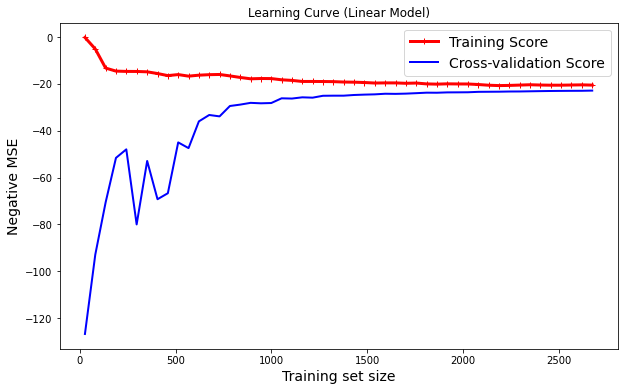

In [39]:
# Create CV training and validation scores for various training set sizes
train_sizes, train_scores, val_scores = learning_curve(Ridge(alpha=0.94, solver='sparse_cg'), X_train_poly, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50),
                                                        n_jobs=-1)
                                                
                                                                                                                                                                                                                 
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

### High bias problem More advanced model needed 


### SVM(RBF kernel) and Random Forrest

In [40]:
param_grid = {'gamma': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'C': [10, 100, 1000, 10000]}



svm = SVR(kernel="rbf")

svm_cv = GridSearchCV(svm, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
svm_cv.fit(X, y)


params_optimal = svm_cv.best_params_

print("Best Score (negative mean squared error): %f" % svm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.8min finished


Best Score (negative mean squared error): -21.186922
Optimal Hyperparameter Values:  {'C': 100, 'gamma': 0.001}




In [41]:
svm = SVR(kernel="rbf", **params_optimal)
svm.fit(X_train, y_train)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_svm = svm.predict(X_train)


print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_svm))


# Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_svm))


# Make prediction using the test data
y_test_predicted_svm = svm.predict(X_test)

test_mse_svm = mean_squared_error(y_test, y_test_predicted_svm)

print("\nTest: Mean squared error: %.2f"
      % test_mse_svm)



# Explained variance score: 1 is perfect prediction

test_r2_svm = r2_score(y_test, y_test_predicted_svm)
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_svm)


----------------------------- Model Evaluation -----------------------------
Train: Mean squared error: 25.21
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75

Test: Mean squared error: 25.76
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.73


In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [43]:
%%time
rnd_forest_reg = RandomForestRegressor()

dt_clf_cv = GridSearchCV(rnd_forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
dt_clf_cv.fit(X_train, y_train)

params_optimal = dt_clf_cv.best_params_

print("Best Score (accuracy): %f" % dt_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 11.7min finished


Best Score (accuracy): -21.063908
Optimal Hyperparameter Values:  {'max_depth': 110, 'max_features': 'sqrt', 'n_estimators': 600}


Wall time: 11min 44s


In [44]:
 params_optimal = {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1800}

In [45]:



rnd_forest_reg = RandomForestRegressor(**params_optimal,criterion="mse"
                                       ,verbose=1,
                                       oob_score=True, n_jobs=-1)

rnd_forest_reg.fit(X_train, y_train)


# Make prediction 
y_train_predicted_rnd_forest = rnd_forest_reg.predict(X_train)


train_mse_rnd_forest = mean_squared_error(y_train, y_train_predicted_rnd_forest)

print("Train: Mean squared error: %.2f"
      % train_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_rnd_forest))




y_test_predicted_rnd_forest = rnd_forest_reg.predict(X_test)


test_mse_rnd_forest = mean_squared_error(y_test, y_test_predicted_rnd_forest)

print("Test: Mean squared error: %.2f"
      % test_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction

test_r2_rnd_forest = r2_score(y_test, y_test_predicted_rnd_forest)


print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_rnd_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_job

Train: Mean squared error: 7.33
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.93
Test: Mean squared error: 23.21
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.76


[Parallel(n_jobs=16)]: Done 1800 out of 1800 | elapsed:    0.1s finished


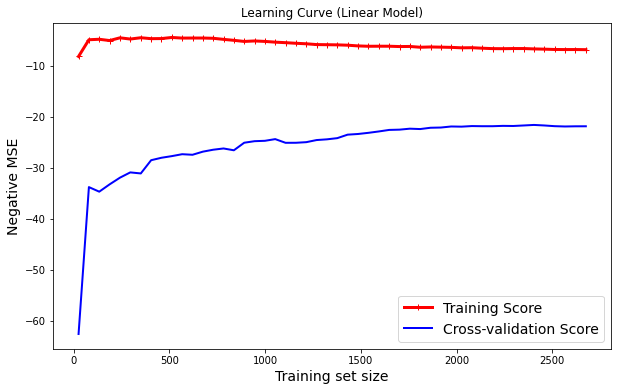

In [46]:
# Create CV training and validation scores for various training set sizes
train_sizes, train_scores, val_scores = learning_curve(RandomForestRegressor(**params_optimal,criterion="mse"
                                       ,verbose=1,
                                       oob_score=True, n_jobs=-1), X_train, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50),
                                                        n_jobs=-1)
                                                
                                                                                                                                                                                                                 
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

## Need More DATA


In [47]:



rnd_forest_reg = RandomForestRegressor(**params_optimal,criterion="mse"
                                       ,verbose=1,
                                       oob_score=True, n_jobs=-1)

rnd_forest_reg.fit(X_train, y_train)


# Make prediction 
y_train_predicted_rnd_forest = rnd_forest_reg.predict(X_train)


train_mse_rnd_forest = mean_squared_error(y_train, y_train_predicted_rnd_forest)

print("Train: Mean squared error: %.2f"
      % train_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_rnd_forest))




y_test_predicted_rnd_forest = rnd_forest_reg.predict(X_test)


test_mse_rnd_forest = mean_squared_error(y_test, y_test_predicted_rnd_forest)

print("Test: Mean squared error: %.2f"
      % test_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction

test_r2_rnd_forest = r2_score(y_test, y_test_predicted_rnd_forest)


print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_rnd_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_job

Train: Mean squared error: 7.36
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.93
Test: Mean squared error: 23.17
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.76


[Parallel(n_jobs=16)]: Done 1800 out of 1800 | elapsed:    0.1s finished


In [48]:
y_test

array([ 4,  1, 38,  1,  7, 29, 15, 18, 26,  2,  7, 12,  7, 46,  8, 26,  4,
        1,  5, 12,  6,  2, 16,  9,  7,  3, 23,  6, 15, 24,  4,  2, 18, 52,
        3, 20, 17,  2, 13, 10,  0,  9, 34,  6,  4,  0,  4,  3,  5, 11,  3,
       22,  2,  2, 19,  6,  1, 14, 17, 17,  6,  0,  6, 15, 17,  1,  6,  5,
       11, 18, 17, 34, 49, 10,  1,  3, 17, 52,  3,  2,  5,  1,  1,  5,  0,
        6,  5, 17, 16,  4, 25, 19, 18, 29, 19,  9, 24,  7, 41, 11,  3,  2,
        4,  3,  2, 18,  3, 24,  3, 14,  8, 13,  1,  9,  7, 15,  2,  6,  1,
        3,  6, 11,  9,  1,  2, 18, 10,  1, 23,  1, 17,  1,  0,  7, 12, 21,
       34, 11, 20,  3, 14,  1, 10,  4,  8,  3, 21,  3, 31,  0, 11, 12,  9,
        5,  4, 19,  9,  0,  1,  2,  3, 25, 13,  2, 13,  0,  3,  4,  3, 19,
       20,  7, 19, 11,  7, 22,  0, 45, 23, 16,  0,  8,  3,  7,  6, 21, 20,
        0, 12,  2,  4, 24,  2, 13,  2, 14, 28,  4,  3,  6,  3, 15, 19, 13,
       15,  1,  7,  7,  2,  1,  1, 20,  6, 48, 15, 16,  7, 17, 20, 17, 14,
        4, 10,  1,  6, 15

In [49]:
y_test_predicted_rnd_forest.astype(int)


array([ 6,  1, 24,  3,  5, 17, 13,  7, 13,  7, 12, 10,  5, 45, 10, 16,  6,
        6,  5, 10, 10,  6, 16,  7,  4,  3, 18,  9,  9, 20,  9,  5, 15, 53,
        3, 17, 17,  4, 14, 11,  1,  7, 14,  8,  2,  3,  4,  7,  5,  3,  2,
       16,  3,  5, 16, 10,  2, 17, 16,  9,  7,  2, 10, 16, 16,  2,  4,  3,
       10, 15, 18, 29, 45,  9,  2,  4, 17, 39,  2,  5,  5,  2,  3,  4,  2,
        9,  2, 16, 16,  7, 17, 15, 18, 27, 12, 10, 18,  9, 52, 11,  5,  5,
        4,  2,  1, 16,  1, 11, 10, 16,  8,  6,  2,  8,  1, 13,  2,  4,  1,
        4,  4,  6,  3,  2,  2, 16,  8,  3, 17, 13, 17,  1,  2, 11,  8, 20,
       29,  5, 10,  3, 17,  1,  7, 13,  6,  2, 16,  7, 16,  4, 11,  8,  6,
        7,  1, 17,  8,  1,  2, 13,  1, 32, 16,  5,  3,  1,  6,  9,  5, 11,
       17, 11, 14, 14,  8, 19,  1, 44, 33, 21,  2, 12,  3,  2,  5, 16, 16,
        3, 13,  2,  3, 18,  2,  9,  2, 12, 19,  7,  2,  4,  2, 13, 16,  9,
       13,  3,  9,  8,  1,  5, 22, 26,  5, 43, 16, 17, 13, 17, 12, 11, 13,
        2,  5,  3,  5, 17

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
max_depth.append(None)

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [51]:
%%time
rnd_forest_reg = RandomForestRegressor()

dt_clf_cv = GridSearchCV(rnd_forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
dt_clf_cv.fit(X, y)

params_optimal = dt_clf_cv.best_params_

print("Best Score (accuracy): %f" % dt_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  4.9min finished


Best Score (accuracy): -21.285496
Optimal Hyperparameter Values:  {'max_depth': 14, 'max_features': 'auto', 'n_estimators': 800}


Wall time: 5min 3s


In [52]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


In [53]:
X_train_poly.shape

(3344, 1000)

In [54]:



rnd_forest_reg = RandomForestRegressor(**params_optimal,criterion="mse"
                                       ,verbose=1,
                                       oob_score=True, n_jobs=-1)

rnd_forest_reg.fit(X_train_poly, y_train)


# Make prediction 
y_train_predicted_rnd_forest = rnd_forest_reg.predict(X_train_poly)


train_mse_rnd_forest = mean_squared_error(y_train, y_train_predicted_rnd_forest)

print("Train: Mean squared error: %.2f"
      % train_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_rnd_forest))




y_test_predicted_rnd_forest = rnd_forest_reg.predict(X_test_poly)


test_mse_rnd_forest = mean_squared_error(y_test, y_test_predicted_rnd_forest)

print("Test: Mean squared error: %.2f"
      % test_mse_rnd_forest)


# Explained variance score: 1 is perfect prediction

test_r2_rnd_forest = r2_score(y_test, y_test_predicted_rnd_forest)


print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_rnd_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.0min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 800 out of 800 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed: 

Train: Mean squared error: 3.70
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.96
Test: Mean squared error: 23.17
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.76


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 800 out of 800 | elapsed:    0.0s finished
